# Exercício 3

## Exercício 3.1

Use o matplotlib e o scipy para desenhar o seguintes gráficos:
1. $y = ln(x)$
2. $y = e^x$

Como você faria para ter uma figura com 2 subplots, cada um com um dos gráficos?

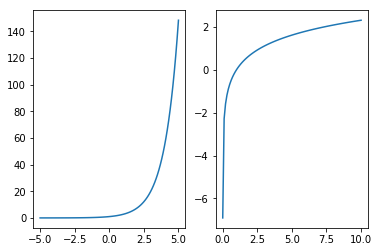

In [19]:
import numpy as np
import matplotlib.pyplot as plt

fig, axs = plt.subplots(ncols=2,nrows=1)

x = np.linspace(-5,5,100)
y = np.exp(x)
u = np.linspace(0.001,10,100)
v = np.log(u)
axs[0].plot(x,y)
axs[1].plot(u,v)

## Exercício 3.2

O código abaixo gera um gráfico 3D para o atrator de Lorenz.
Cada elemento `i` das array `xs`, `ys` e `zs` é uma o valor da coordenada no instante `i` e a função `lorenz` caulcula as derivadas das coordenadas.
O loop 
```python
for i in range(num_steps):
    x_dot, y_dot, z_dot = lorenz(xs[i], ys[i], zs[i])
    xs[i + 1] = xs[i] + (x_dot * dt)
    ys[i + 1] = ys[i] + (y_dot * dt)
    zs[i + 1] = zs[i] + (z_dot * dt)
```
calcula o valor das coordenadas em `i+1` dado o valor em `i`.

Crie, usando o trabalho já feito nesse código, uma animação para mostrar o atrator de Lorenz sendo plotado a cada instante.

In [2]:
%matplotlib
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


def lorenz(x, y, z, s=10, r=28, b=2.667):
    '''
    Given:
       x, y, z: a point of interest in three dimensional space
       s, r, b: parameters defining the lorenz attractor
    Returns:
       x_dot, y_dot, z_dot: values of the lorenz attractor's partial
           derivatives at the point x, y, z
    '''
    x_dot = s*(y - x)
    y_dot = r*x - y - x*z
    z_dot = x*y - b*z
    return x_dot, y_dot, z_dot


dt = 0.01
num_steps = 10000

# o shape das arrays é o número de passos + 1 para os valores iniciais
xs = np.empty((num_steps + 1,))
ys = np.empty((num_steps + 1,))
zs = np.empty((num_steps + 1,))

# Valores iniciais
xs[0], ys[0], zs[0] = (0., 1., 1.05)

# Caminha no "tempo", calculando as derivatas no instante atual e 
# os usando para estimar o próximo ponto
for i in range(num_steps):
    x_dot, y_dot, z_dot = lorenz(xs[i], ys[i], zs[i])
    xs[i + 1] = xs[i] + (x_dot * dt)
    ys[i + 1] = ys[i] + (y_dot * dt)
    zs[i + 1] = zs[i] + (z_dot * dt)

# Plot
# fig = plt.figure()
# ax = fig.gca(projection='3d')
# ax.plot(xs, ys, zs, 'r',lw=0.5)
# ax.set_xlabel("X Axis")
# ax.set_ylabel("Y Axis")
# ax.set_zlabel("Z Axis")
# ax.set_title("Lorenz Attractor")

from matplotlib.animation import FuncAnimation

fig, (ax1,ax2) = plt.subplots(ncols=2, subplot_kw={'projection':'3d'})
ax2.plot(xs, ys, zs, 'r',lw=0.5)
ax2.set_xlabel("X Axis")
ax2.set_ylabel("Y Axis")
ax2.set_zlabel("Z Axis")
ax2.set_title("Lorenz Attractor")

xt,yt,zt = [0.],[1.],[1.05]
c, = ax1.plot(xt,yt,zt,'r',lw=0.5,animated=True)

def init():
    ax1.set_xlabel("X Axis")
    ax1.set_ylabel("Y Axis")
    ax1.set_zlabel("Z Axis")
    ax1.set_title("Lorenz Attractor Animated")
    return c,

def update(frame):
    x_dot, y_dot, z_dot = lorenz(xt[-1], yt[-1], zt[-1])
    xt.append(xt[-1] + (x_dot * dt))
    yt.append(yt[-1] + (y_dot * dt))
    zt.append(zt[-1] + (z_dot * dt))
    c.set_data(xt,yt)
    c.set_3d_properties(zt)
    return c,

ani = FuncAnimation(fig,update,interval=1,frames=num_steps,init_func=init,blit=True)

plt.show()

Using matplotlib backend: Qt5Agg


In [58]:
foo, axs = plt.subplots(ncols=2, subplot_kw={'projection':'3d'})

In [66]:
foo = plt.figure()
foo.add_subplot(projection='3d')

In [65]:
plt.show()

In [40]:
import numpy as np
import matplotlib.pyplot as plt
import mpl_toolkits.mplot3d.axes3d as p3
import matplotlib.animation as animation

# Fixing random state for reproducibility
np.random.seed(19680801)


def Gen_RandLine(length, dims=2):
    """
    Create a line using a random walk algorithm

    length is the number of points for the line.
    dims is the number of dimensions the line has.
    """
    lineData = np.empty((dims, length))
    lineData[:, 0] = np.random.rand(dims)
    for index in range(1, length):
        # scaling the random numbers by 0.1 so
        # movement is small compared to position.
        # subtraction by 0.5 is to change the range to [-0.5, 0.5]
        # to allow a line to move backwards.
        step = ((np.random.rand(dims) - 0.5) * 0.1)
        lineData[:, index] = lineData[:, index - 1] + step

    return lineData


def update_lines(num, dataLines, lines):
    for line, data in zip(lines, dataLines):
        # NOTE: there is no .set_data() for 3 dim data...
        line.set_data(data[0:2, :num])
        line.set_3d_properties(data[2, :num])
    return lines

# Attaching 3D axis to the figure
fig = plt.figure()
ax = p3.Axes3D(fig)

# Fifty lines of random 3-D lines
data = [Gen_RandLine(25, 3) for index in range(50)]

# Creating fifty line objects.
# NOTE: Can't pass empty arrays into 3d version of plot()
lines = [ax.plot(dat[0, 0:1], dat[1, 0:1], dat[2, 0:1])[0] for dat in data]

# Setting the axes properties
ax.set_xlim3d([0.0, 1.0])
ax.set_xlabel('X')

ax.set_ylim3d([0.0, 1.0])
ax.set_ylabel('Y')

ax.set_zlim3d([0.0, 1.0])
ax.set_zlabel('Z')

ax.set_title('3D Test')

# Creating the Animation object
line_ani = animation.FuncAnimation(fig, update_lines, 25, fargs=(data, lines),
                                   interval=50, blit=False)

plt.show()

In [3]:
%matplotlib
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

# Fixing random state for reproducibility
np.random.seed(19680801)


# Create new Figure with black background
fig = plt.figure(figsize=(8, 8), facecolor='black')

# Add a subplot with no frame
ax = plt.subplot(111, frameon=False)

# Generate random data
data = np.random.uniform(0, 1, (64, 75))
X = np.linspace(-1, 1, data.shape[-1])
G = 1.5 * np.exp(-4 * X ** 2)

# Generate line plots
lines = []
for i in range(len(data)):
    # Small reduction of the X extents to get a cheap perspective effect
    xscale = 1 - i / 200.
    # Same for linewidth (thicker strokes on bottom)
    lw = 1.5 - i / 100.0
    line, = ax.plot(xscale * X, i + G * data[i], color="w", lw=lw)
    lines.append(line)

# Set y limit (or first line is cropped because of thickness)
ax.set_ylim(-1, 70)

# No ticks
ax.set_xticks([])
ax.set_yticks([])

# 2 part titles to get different font weights
ax.text(0.5, 1.0, "MATPLOTLIB ", transform=ax.transAxes,
        ha="right", va="bottom", color="w",
        family="sans-serif", fontweight="light", fontsize=16)
ax.text(0.5, 1.0, "UNCHAINED", transform=ax.transAxes,
        ha="left", va="bottom", color="w",
        family="sans-serif", fontweight="bold", fontsize=16)


def update(*args):
    # Shift all data to the right
    data[:, 1:] = data[:, :-1]

    # Fill-in new values
    data[:, 0] = np.random.uniform(0, 1, len(data))

    # Update data
    for i in range(len(data)):
        lines[i].set_ydata(i + G * data[i])

    # Return modified artists
    return lines

# Construct the animation, using the update function as the animation director.
anim = animation.FuncAnimation(fig, update, interval=10)
plt.show()

Using matplotlib backend: Qt5Agg


## Exercício 3.3 

Vá ao site da galeria do matplotlib, escolha um gráfico pela imagem e tente reproduzí-lo.
Se não conseguir depois de 10 minutos, olhe o código e copie. Depois escolhar outro e repita as instruções.
O exercício termina quando você reproduzir gráficos o bastante para entender como se virar sozinho.